<a href="https://colab.research.google.com/github/AndreSlavescu/Number-Game/blob/main/handwritten_character_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installations

In [1]:
pip install opencv-python tensorflowjs

     |████████████████████████████████| 64 kB 2.9 MB/s 


# Initial Setup

In [2]:
import cv2 #OpenCV python computer vision library
import numpy as np #numerical python library
import matplotlib.pyplot as plt #mathematical plotting library
import tensorflow as tf
import tensorflowjs as tfjs #tensorflow library for javascript
from tensorflow import keras

# Dataset


In [3]:
#Handwritten digits dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale down images from 0-255 to 0-1 to be computed easier and to have percentages
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

11493376/11490434 [==============================] - 0s 0us/step


# Model Creation

learn more about rectify linear unit functions here: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

learn more about softmax activation functions here:
https://machinelearningmastery.com/softmax-activation-function-with-python/

In [5]:
#1 input layer with two hidden layers to get 1 output layer

model = tf.keras.models.Sequential() #generate a simple neural network
model.add(tf.keras.layers.Flatten(input_shape = (28, 28))) #flattens the 28 by 28 image input into a 784 by 1 array of pixels

#both dense layers are connected to input and output layer
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) #set amount of neurons for model complexity
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) #specify activation function: rectify linear unit (relu)

#dense output layer with 10 neurons. Generates probability for what the number is from 0-9 given all the stored activations 
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)) #softmax compiles these activations to be added to 1


#Model Compilation

learn more about the adam optimization algorithm here: https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a

In [6]:
#compiling model using the adam optimizer for stochastic gradient descent 
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5) #5 epochs are set to train against the training-set 5 times
loss, accuracy = model.evaluate(x_test, y_test) #model evaluates accuracy by evaluating accuracy on the test-set 

model.save("handwritten_digits.model") 

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2615 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0709 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9742
INFO:tensorflow:Assets written to: handwritten_digits.model/assets


In [13]:
#print(f"x_test: {x_test}", f"y_test: {y_test}")
print(f"loss: {round(loss, 2)}", "|", f"accuracy: {round(accuracy*100, 2)}%")

loss: 0.09 | accuracy: 97.42%


#Test Images
----

index of highest value:  2


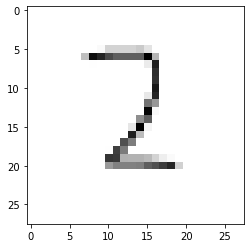

In [22]:
#load test images and predict the value of the handwritten character

img = cv2.imread("2.jpeg")
dim = (28, 28)
  
#resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img = np.invert(np.array([img[:,:,0]]))
prediction = model.predict(img) #predict image value
print("index of highest value: ", np.argmax(prediction))
plt.imshow(img[0], cmap = plt.cm.binary)
plt.show()

# Download model as JSON

In [20]:
#save model as a tensorflow js format
tfjs.converters.save_keras_model(model, "handwritten_digits.model/assets")